# Credit Card Fraud
We're looking to minimize the False Negative Rate or FNR.

Since the dataset is unbalanced, we can try two techniques that may help us have better predictions:

- Adding some noise (gaussian) to the fraud data to create more and reduce the imbalance
- Randomly sample the fraud data and train k models and average them out (or choose the best)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Mnesoma\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
df = pd.read_csv('creditcard.csv', low_memory=False)
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,46375.0,-1.188475,0.741842,1.012358,-0.403848,-0.296279,-1.199539,0.411554,0.406564,-0.284847,...,0.050697,-0.164207,0.047955,0.352960,-0.188352,0.222495,0.157370,0.078376,49.99,0
1,161856.0,-0.329387,1.272450,-0.384084,0.514773,1.425933,0.047404,1.355803,-0.229888,-0.196655,...,0.011464,0.461422,-0.441875,-1.127337,0.090477,-0.359732,0.231069,0.056658,1.99,0
2,125879.0,2.057270,-0.040431,-1.124191,0.383125,-0.031103,-1.113533,0.229712,-0.358914,0.467485,...,-0.287684,-0.685587,0.308161,-0.094908,-0.263114,0.202369,-0.068883,-0.058826,9.99,0
3,147645.0,1.915762,1.753538,-2.592348,4.416900,1.504678,-1.279130,0.641565,-0.313370,-1.462187,...,-0.022968,0.061429,-0.026413,-0.366371,0.152671,0.135607,0.026310,0.061945,0.00,0
4,138356.0,-0.708190,-1.278300,1.950840,-0.880215,-0.282634,0.006003,-1.374533,0.490273,-0.157011,...,0.174686,0.363718,0.039249,-0.354468,-0.498980,-0.133635,0.161716,0.161888,15.29,0


In [3]:
frauds = df.loc[df['Class'] == 1]
non_frauds = df.loc[df['Class'] == 0]
print("We have", len(frauds), "fraud data points and", len(non_frauds), "nonfraudulent data points.")

We have 492 fraud data points and 284315 nonfraudulent data points.


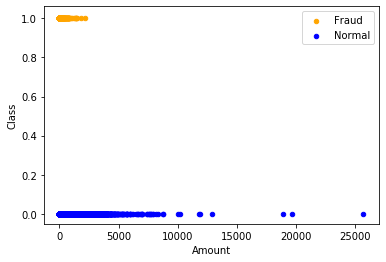

This feature looks important based on their distribution with respect to class.
We will now zoom in onto the fraud data to see the ranges of amount just for fun.


In [4]:
ax = frauds.plot.scatter(x='Amount', y='Class', color='Orange', label='Fraud')
non_frauds.plot.scatter(x='Amount', y='Class', color='Blue', label='Normal', ax=ax)
plt.show()
print("This feature looks important based on their distribution with respect to class.")
print("We will now zoom in onto the fraud data to see the ranges of amount just for fun.")

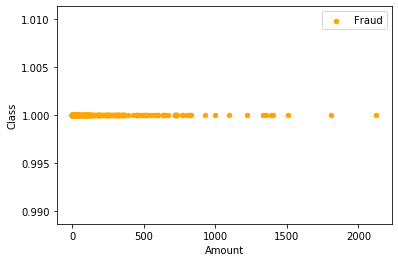

In [5]:
bx = frauds.plot.scatter(x='Amount', y='Class', color='Orange', label='Fraud')
plt.show()


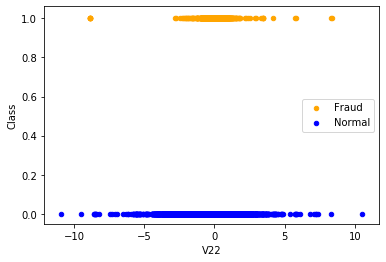

This feature may not be very important because of the similar distribution.


In [6]:
ax = frauds.plot.scatter(x='V22', y='Class', color='Orange', label='Fraud')
non_frauds.plot.scatter(x='V22', y='Class', color='Blue', label='Normal', ax=ax)
plt.show()
print("This feature may not be very important because of the similar distribution.")

# Logistic Regression (vanilla)

In [7]:
from sklearn import datasets, linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [8]:
X = df.iloc[:,:-1]
y = df['Class']

print("X and y sizes, respectively:", len(X), len(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)
print("Train and test sizes, respectively:", len(X_train), len(y_train), "|", len(X_test), len(y_test))
print("Total number of frauds:", len(y.loc[df['Class'] == 1]), len(y.loc[df['Class'] == 1])/len(y))
print("Number of frauds on y_test:", len(y_test.loc[df['Class'] == 1]), len(y_test.loc[df['Class'] == 1]) / len(y_test))
print("Number of frauds on y_train:", len(y_train.loc[df['Class'] == 1]), len(y_train.loc[df['Class'] == 1])/len(y_train))

X and y sizes, respectively: 284807 284807
Train and test sizes, respectively: 185124 185124 | 99683 99683
Total number of frauds: 492 0.001727485630620034
Number of frauds on y_test: 168 0.0016853425358386083
Number of frauds on y_train: 324 0.0017501782588967396


In [9]:
logistic = linear_model.LogisticRegression(C=1e5)
logistic.fit(X_train, y_train)
print("Score: ", logistic.score(X_test, y_test))

Score:  0.999197455935315


C:\Users\Mnesoma\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [12]:
y_predicted = np.array(logistic.predict(X_test))
y_right = np.array(y_test)

Confusion matrix:
[[99474    41]
 [   39   129]]


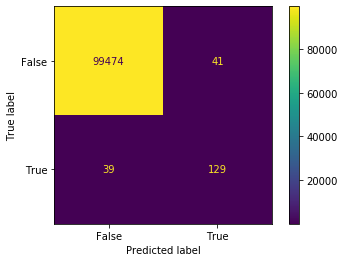

In [22]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_right, y_predicted)
print("Confusion matrix:\n%s" % confusion_matrix)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

from sklearn.preprocessing import scale
import random